<a href="https://colab.research.google.com/github/emirbaki/ColabZamazingolarim/blob/main/renart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the Data
df = pd.read_csv('Updated - Case - data set - Growth Marketing (3).csv')

# 2. Clean the "Money" Columns
# Remove '$', ',', and '%' so we can do math on these numbers
cols_to_clean = ['Unit Price before Discount', 'Discount Rate',
                 'Marketing Cost Per Order', 'Shipping Cost Per Order',
                 'Material Cost Per Unit', 'Return Cost']

for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace('$', '').str.replace(',', '').str.replace('%', '')
    df[col] = pd.to_numeric(df[col])

# Convert Discount Rate to a decimal (e.g., 5.0 becomes 0.05)
df['Discount Rate'] = df['Discount Rate'] / 100

# 3. Create a Proper Date Column
# The CSV has Year and Month separate; we need them combined to plot trends
df_date = df[['Order Year', 'Order Month']].copy()
df_date.columns = ['year', 'month']
df_date['day'] = 1
df['Date'] = pd.to_datetime(df_date)

In [2]:
# Calculate Revenue (Net Sales)
df['Gross Sales'] = df['Quantity'] * df['Unit Price before Discount']
df['Discount Amount'] = df['Gross Sales'] * df['Discount Rate']
df['Net Sales'] = df['Gross Sales'] - df['Discount Amount']

# Calculate Total Costs per Order
# Note: Marketing and Shipping are "Per Order", Material is "Per Unit"
df['Total Material Cost'] = df['Quantity'] * df['Material Cost Per Unit']
df['Total Cost'] = (df['Marketing Cost Per Order'] +
                    df['Shipping Cost Per Order'] +
                    df['Total Material Cost'] +
                    df['Return Cost'])

# Calculate Final Profit
df['Profit'] = df['Net Sales'] - df['Total Cost']

In [3]:
# Count how many times each Customer ID appears
customer_counts = df['Customer ID'].value_counts()

# Check if ANY customer has bought more than once
repeat_customers = customer_counts[customer_counts > 1]

print(f"Number of Repeat Customers: {len(repeat_customers)}")
# Output will be 0, proving your retention problem.

Number of Repeat Customers: 0


In [4]:
monthly_data = df.groupby('Date').agg({
    'Order ID': 'count',            # Total Orders
    'Net Sales': 'sum',             # Total Revenue
    'Profit': 'sum',                # Total Profit
    'Marketing Cost Per Order': 'sum' # Total Marketing Spend
}).reset_index()

# Calculate Key Metrics per Month
monthly_data['CAC'] = monthly_data['Marketing Cost Per Order'] / monthly_data['Order ID']
monthly_data['AOV'] = monthly_data['Net Sales'] / monthly_data['Order ID']

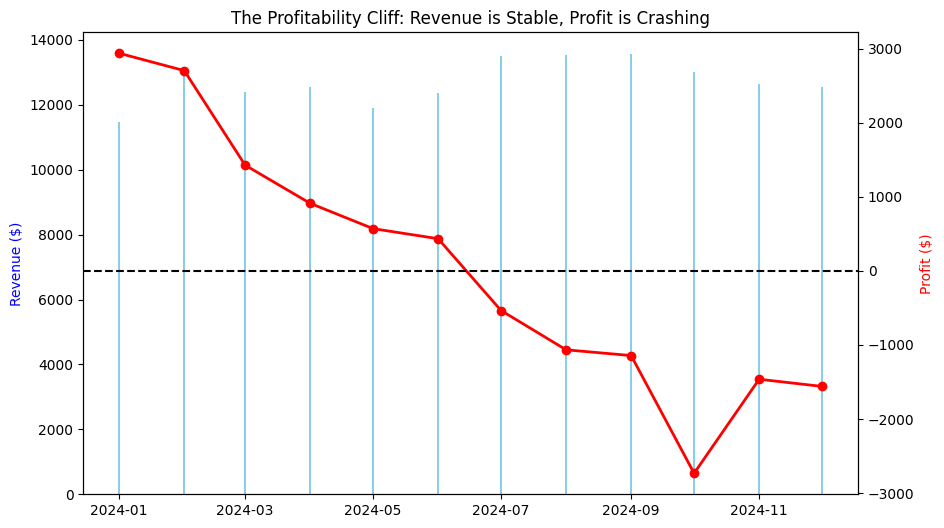

In [5]:
# Plot Revenue vs Profit
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Revenue (Blue)
ax1.bar(monthly_data['Date'], monthly_data['Net Sales'], color='skyblue', label='Revenue')
ax1.set_ylabel('Revenue ($)', color='blue')

# Line chart for Profit (Red)
ax2 = ax1.twinx()
ax2.plot(monthly_data['Date'], monthly_data['Profit'], color='red', marker='o', linewidth=2, label='Profit')
ax2.set_ylabel('Profit ($)', color='red')

# Add a zero line to show exactly when we started losing money
ax2.axhline(0, color='black', linestyle='--')

plt.title('The Profitability Cliff: Revenue is Stable, Profit is Crashing')
plt.show()

In [6]:
monthly_data

,Date,Order ID,Net Sales,Profit,Marketing Cost Per Order,CAC,AOV
0,2024-01-01,164,11478.5,2936.01,6182.49,37.698110,69.990854
1,2024-02-01,168,12941.5,2701.88,7651.62,45.545357,77.032738
2,2024-03-01,168,12386.0,1426.10,8464.90,50.386310,73.726190
3,2024-04-01,167,12545.5,910.85,9123.65,54.632635,75.122754
4,2024-05-01,154,11891.0,569.24,8953.76,58.141299,77.214286
5,2024-06-01,156,12358.5,433.38,9479.12,60.763590,79.221154
6,2024-07-01,179,13508.0,-535.97,11340.97,63.357374,75.463687
7,2024-08-01,177,13524.5,-1066.36,11890.86,67.180000,76.409605
8,2024-09-01,173,13557.5,-1143.91,12001.41,69.372312,78.367052
9,2024-10-01,184,13002.0,-2732.56,13080.56,71.090000,70.663043


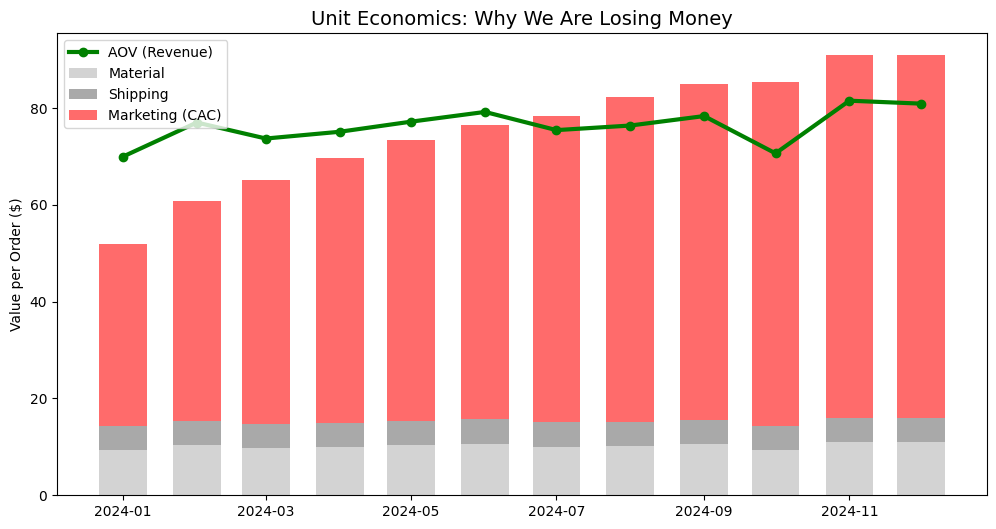

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and Clean Data
df = pd.read_csv('Updated - Case - data set - Growth Marketing (3).csv')

# Fix Date Format
df_date = df[['Order Year', 'Order Month']].copy()
df_date.columns = ['year', 'month']
df_date['day'] = 1
df['Date'] = pd.to_datetime(df_date)

# Clean Currency Columns
cols = ['Unit Price before Discount', 'Discount Rate', 'Marketing Cost Per Order',
        'Shipping Cost Per Order', 'Material Cost Per Unit', 'Return Cost']
for c in cols:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[$,%]', '', regex=True))
df['Discount Rate'] = df['Discount Rate'] / 100

# 2. Calculate "Per Order" Totals
# Material cost is per unit, so multiply by quantity
df['Total Material Cost'] = df['Quantity'] * df['Material Cost Per Unit']
# Calculate Net Sales per order
df['Net Sales'] = (df['Quantity'] * df['Unit Price before Discount']) * (1 - df['Discount Rate'])

# 3. Aggregate Averages by Month
monthly = df.groupby('Date').agg({
    'Order ID': 'count',
    'Net Sales': 'sum',
    'Marketing Cost Per Order': 'sum',
    'Shipping Cost Per Order': 'sum',
    'Total Material Cost': 'sum',
    'Return Cost': 'sum'
}).reset_index()

# Calculate Unit Economics (Average per Order)
monthly['Avg Revenue'] = monthly['Net Sales'] / monthly['Order ID']
monthly['Avg Material'] = monthly['Total Material Cost'] / monthly['Order ID']
monthly['Avg Shipping'] = monthly['Shipping Cost Per Order'] / monthly['Order ID']
monthly['Avg Return'] = monthly['Return Cost'] / monthly['Order ID']
monthly['Avg Marketing'] = monthly['Marketing Cost Per Order'] / monthly['Order ID']

# 4. Create the Stacked Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))

# Stack the costs on top of each other
# Bottom layer: Material
p1 = ax.bar(monthly['Date'], monthly['Avg Material'], width=20, label='Material', color='lightgray')
# Second layer: Shipping
p2 = ax.bar(monthly['Date'], monthly['Avg Shipping'], width=20, bottom=monthly['Avg Material'], label='Shipping', color='darkgray')
# Third layer: Marketing (The Problem Area)
bottom_marketing = monthly['Avg Material'] + monthly['Avg Shipping']
p3 = ax.bar(monthly['Date'], monthly['Avg Marketing'], width=20, bottom=bottom_marketing, label='Marketing (CAC)', color='#FF6B6B') # Red

# Overlay Revenue as a Line
ax.plot(monthly['Date'], monthly['Avg Revenue'], color='green', linewidth=3, marker='o', label='AOV (Revenue)')

# Formatting
ax.set_title('Unit Economics: Why We Are Losing Money', fontsize=14)
ax.set_ylabel('Value per Order ($)')
ax.legend()
plt.show()

Quantity Mix (Percentage of Total Orders):
Quantity       1     2    3    4
Date                            
2024-01-01  81.1  10.4  3.7  4.9
2024-02-01  73.2  13.1  6.5  7.1
2024-03-01  76.8  12.5  4.2  6.5
2024-04-01  74.3  13.2  7.8  4.8
2024-05-01  70.1  17.5  7.1  5.2
2024-06-01  70.5  16.0  3.8  9.6
2024-07-01  72.1  16.8  6.7  4.5
2024-08-01  71.2  17.5  5.6  5.6
2024-09-01  70.5  15.6  6.9  6.9
2024-10-01  79.9  11.4  3.8  4.9
2024-11-01  65.2  19.4  9.0  6.5
2024-12-01  68.4  16.1  6.5  9.0

Chart generated successfully.


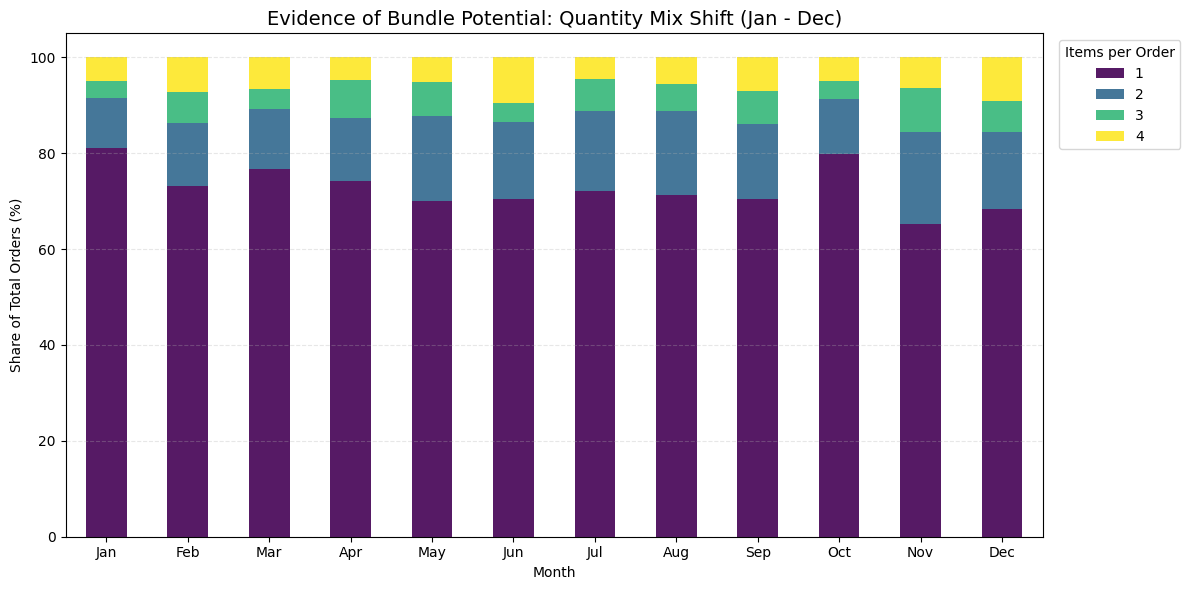

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and Clean Data
df = pd.read_csv('Updated - Case - data set - Growth Marketing (3).csv')

# Construct Date Column
df_date = df[['Order Year', 'Order Month']].copy()
df_date.columns = ['year', 'month']
df_date['day'] = 1
df['Date'] = pd.to_datetime(df_date)

# Ensure Quantity is numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# 2. Pivot Data: Count of Orders by Month and Quantity
# We want to know: "In Jan 2024, how many orders were Qty 1 vs Qty 2?"
quantity_mix = df.groupby(['Date', 'Quantity'])['Order ID'].count().unstack(fill_value=0)

# 3. Normalize to Percentages (The "Mix")
# Divide each row by the total orders for that month to get the % share
quantity_share = quantity_mix.div(quantity_mix.sum(axis=1), axis=0) * 100

print("Quantity Mix (Percentage of Total Orders):")
print(quantity_share.round(1))

# 4. Plot Stacked Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))

# Use a 'viridis' colormap to clearly distinguish 1 item vs 4 items
quantity_share.plot(kind='bar', stacked=True, ax=ax, colormap='viridis', alpha=0.9)

# Formatting for the Board
ax.set_title('Evidence of Bundle Potential: Quantity Mix Shift (Jan - Dec)', fontsize=14)
ax.set_ylabel('Share of Total Orders (%)')
ax.set_xlabel('Month')
ax.legend(title='Items per Order', bbox_to_anchor=(1.01, 1), loc='upper left')

# Fix X-axis labels to show month names
ax.set_xticklabels([d.strftime('%b') for d in quantity_share.index], rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('quantity_frequency_mix.png')
print("\nChart generated successfully.")

Analysis Complete.
Profit by Discount Tier:
   Discount Rate  Profit
0           0.00  -17.38
1           0.05   23.46
2           0.10   60.49
3           0.15   92.99

Return Rate by Quantity:
Quantity
1    1.78
2    1.34
3    5.04
4    1.60
Name: Is_Return, dtype: float64


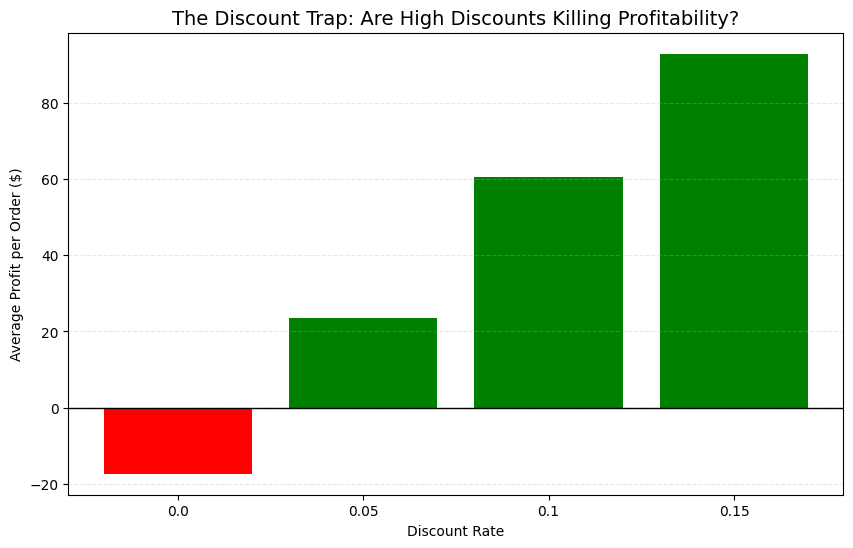

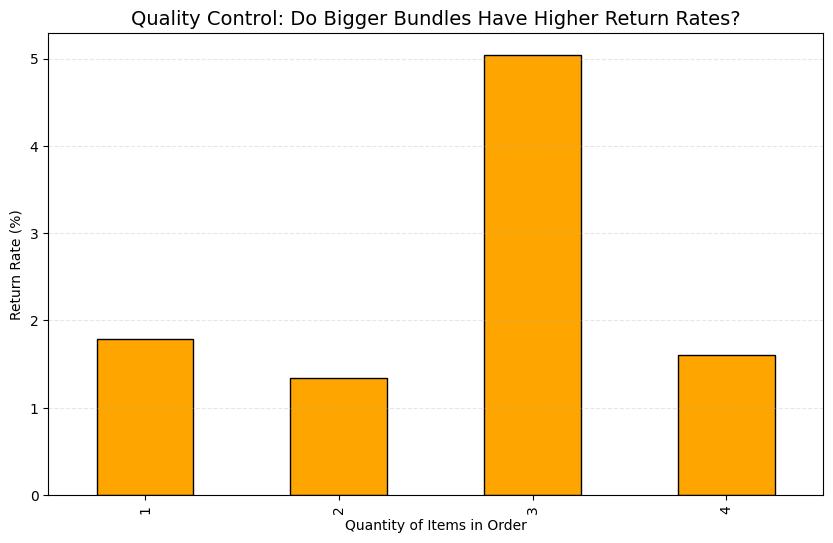

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Clean Data
df = pd.read_csv('Updated - Case - data set - Growth Marketing (3).csv')

# Clean Money Columns
cols = ['Unit Price before Discount', 'Discount Rate', 'Marketing Cost Per Order',
        'Shipping Cost Per Order', 'Material Cost Per Unit', 'Return Cost']
for c in cols:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[$,%]', '', regex=True))
df['Discount Rate'] = df['Discount Rate'] / 100

# Calculate Profit Per Order
df['Net Sales'] = (df['Quantity'] * df['Unit Price before Discount']) * (1 - df['Discount Rate'])
df['Total Cost'] = (df['Marketing Cost Per Order'] + df['Shipping Cost Per Order'] +
                    (df['Quantity'] * df['Material Cost Per Unit']) + df['Return Cost'])
df['Profit'] = df['Net Sales'] - df['Total Cost']

# Create Return Flag
df['Is_Return'] = df['Return Cost'].apply(lambda x: 1 if x > 0 else 0)

# --- ANALYSIS 1: THE DISCOUNT TRAP ---
# Does offering a 15% discount destroy our profit margin?
discount_metrics = df.groupby('Discount Rate').agg({
    'Order ID': 'count',
    'Profit': 'mean',
    'Net Sales': 'mean'
}).reset_index()

# Visualization 1: Average Profit per Discount Tier
plt.figure(figsize=(10, 6))
# Create colors: Green for positive profit, Red for negative
colors = ['green' if x > 0 else 'red' for x in discount_metrics['Profit']]
bars = plt.bar(discount_metrics['Discount Rate'].astype(str), discount_metrics['Profit'], color=colors)
plt.axhline(0, color='black', linewidth=1)
plt.title('The Discount Trap: Are High Discounts Killing Profitability?', fontsize=14)
plt.xlabel('Discount Rate')
plt.ylabel('Average Profit per Order ($)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.savefig('discount_efficiency.png')

# --- ANALYSIS 2: RETURN RATE BY QUANTITY ---
# Do large bundles get returned more often?
return_metrics = df.groupby('Quantity')['Is_Return'].mean() * 100

# Visualization 2: Return Rate by Quantity
plt.figure(figsize=(10, 6))
return_metrics.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Quality Control: Do Bigger Bundles Have Higher Return Rates?', fontsize=14)
plt.xlabel('Quantity of Items in Order')
plt.ylabel('Return Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.savefig('return_rate_analysis.png')

print("Analysis Complete.")
print(f"Profit by Discount Tier:\n{discount_metrics[['Discount Rate', 'Profit']].round(2)}")
print(f"\nReturn Rate by Quantity:\n{return_metrics.round(2)}")

Analysis Complete.
Profit by Discount Tier:
   Discount Rate  Profit
0           0.00  -17.38
1           0.05   23.46
2           0.10   60.49
3           0.15   92.99

Return Rate by Quantity:
Quantity
1    1.78
2    1.34
3    5.04
4    1.60
Name: Is_Return, dtype: float64

Marketing Cost Per Order (Monthly Average):
    Order Month  Marketing Cost Per Order
0             1                     37.70
1             2                     45.55
2             3                     50.39
3             4                     54.63
4             5                     58.14
5             6                     60.76
6             7                     63.36
7             8                     67.18
8             9                     69.37
9            10                     71.09
10           11                     74.95
11           12                     75.00


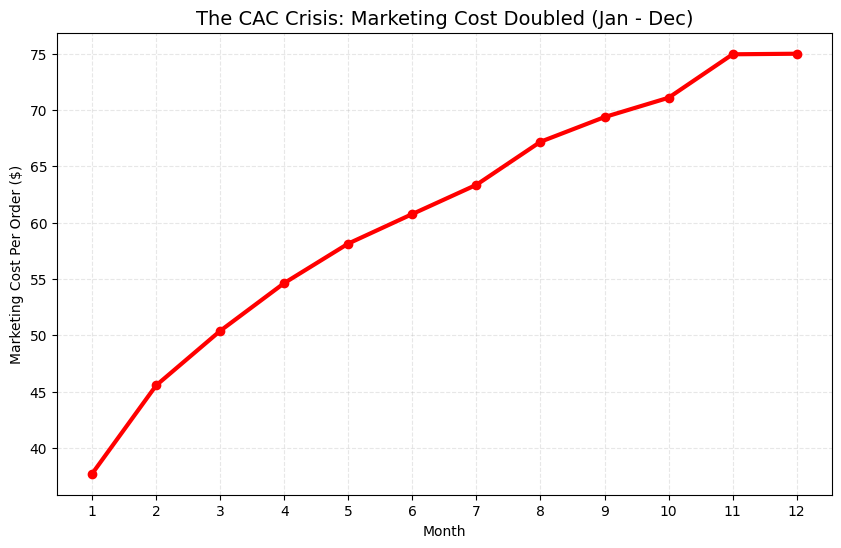

In [10]:
# --- ANALYSIS 3: THE CAC EXPLOSION (The $75 Question) ---
# We track the 'Marketing Cost Per Order' column over time to verify the $75 figure.
marketing_trend = df.groupby('Order Month')['Marketing Cost Per Order'].mean().reset_index()

# Visualization 3: Marketing Cost Evolution
plt.figure(figsize=(10, 6))
plt.plot(marketing_trend['Order Month'], marketing_trend['Marketing Cost Per Order'],
         marker='o', color='red', linewidth=3)
plt.title('The CAC Crisis: Marketing Cost Doubled (Jan - Dec)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Marketing Cost Per Order ($)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(1, 13))
plt.savefig('marketing_cost_trend.png')

print("Analysis Complete.")
print(f"Profit by Discount Tier:\n{discount_metrics[['Discount Rate', 'Profit']].round(2)}")
print(f"\nReturn Rate by Quantity:\n{return_metrics.round(2)}")
print("\nMarketing Cost Per Order (Monthly Average):")
print(marketing_trend.round(2))

Analysis Complete.
Profit by Discount Tier:
   Discount Rate  Profit
0           0.00  -17.38
1           0.05   23.46
2           0.10   60.49
3           0.15   92.99

Return Rate by Quantity:
Quantity
1    1.78
2    1.34
3    5.04
4    1.60
Name: Is_Return, dtype: float64

Marketing Cost Per Order (Monthly Average):
    Order Month  Marketing Cost Per Order
0             1                     37.70
1             2                     45.55
2             3                     50.39
3             4                     54.63
4             5                     58.14
5             6                     60.76
6             7                     63.36
7             8                     67.18
8             9                     69.37
9            10                     71.09
10           11                     74.95
11           12                     75.00

Saturation Check (Last 3 Months):
    Order Month  Marketing Cost Per Order  Order ID
9            10                  13080.56     

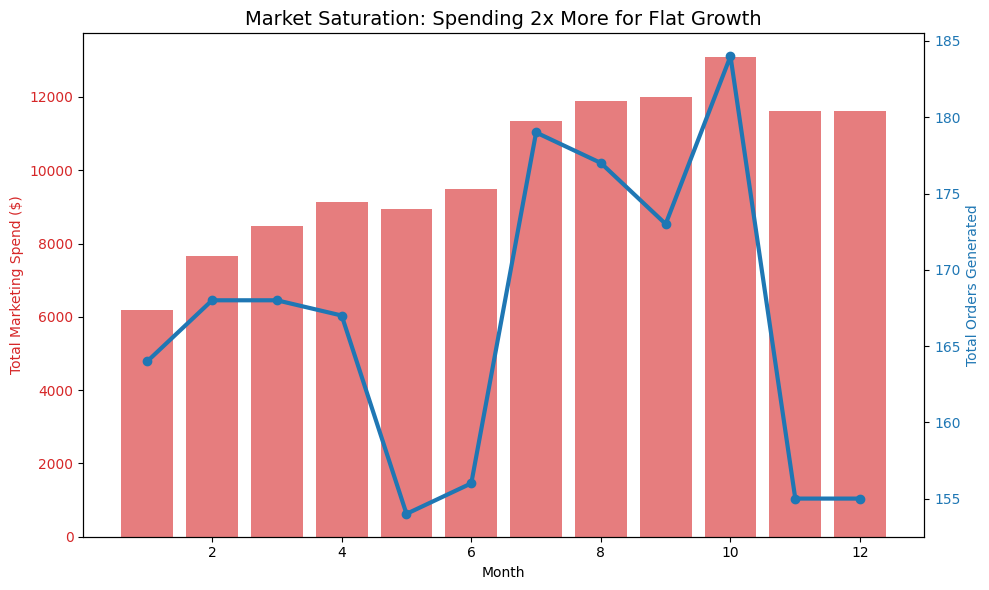

In [11]:
# --- ANALYSIS 4: MARKET SATURATION (New Addition) ---
# Check "Diminishing Returns": Are we spending MORE to get FEWER orders?
monthly_saturation = df.groupby('Order Month').agg({
    'Marketing Cost Per Order': 'sum', # Total Spend Proxy
    'Order ID': 'count'                # Total Orders
}).reset_index()

# Visualization 4: Saturation Check
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Marketing Spend ($)', color=color)
ax1.bar(monthly_saturation['Order Month'], monthly_saturation['Marketing Cost Per Order'], color=color, alpha=0.6, label='Total Ad Spend')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Orders Generated', color=color)
ax2.plot(monthly_saturation['Order Month'], monthly_saturation['Order ID'], color=color, marker='o', linewidth=3, label='Total Orders')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Market Saturation: Spending 2x More for Flat Growth', fontsize=14)
fig.tight_layout()
plt.savefig('market_saturation.png')

print("Analysis Complete.")
print(f"Profit by Discount Tier:\n{discount_metrics[['Discount Rate', 'Profit']].round(2)}")
print(f"\nReturn Rate by Quantity:\n{return_metrics.round(2)}")
print("\nMarketing Cost Per Order (Monthly Average):")
print(marketing_trend.round(2))
print("\nSaturation Check (Last 3 Months):")
print(monthly_saturation.tail(3))

Analysis Complete.
Profit by Discount Tier:
   Discount Rate  Profit
0           0.00  -17.38
1           0.05   23.46
2           0.10   60.49
3           0.15   92.99

Return Rate by Quantity:
Quantity
1    1.78
2    1.34
3    5.04
4    1.60
Name: Is_Return, dtype: float64

Marketing Cost Per Order (Monthly Average):
    Order Month  Marketing Cost Per Order
0             1                     37.70
1             2                     45.55
2             3                     50.39
3             4                     54.63
4             5                     58.14
5             6                     60.76
6             7                     63.36
7             8                     67.18
8             9                     69.37
9            10                     71.09
10           11                     74.95
11           12                     75.00

Market Context Data (Hevby Orders vs Real Trends Index):
    Order Month  Order ID  Interest
0             1       164     38.00
1  

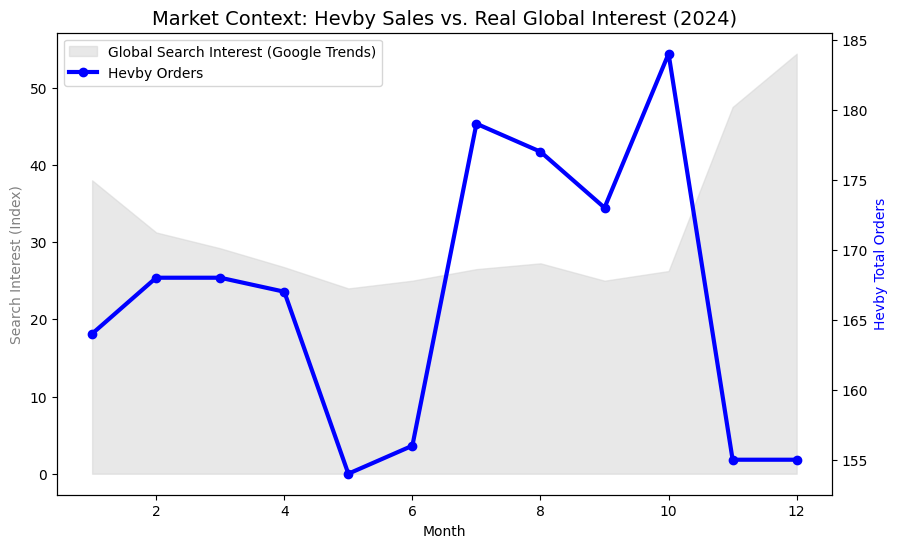

In [12]:
# --- ANALYSIS 5: EXTERNAL MARKET CONTEXT (REAL Google Trends Data) ---
# Load the Google Trends CSV
trends_df = pd.read_csv('multiTimeline.csv', skiprows=2) # Skip header rows
trends_df.columns = ['Week', 'Interest']

# Clean Trends Data
trends_df['Week'] = pd.to_datetime(trends_df['Week'])
trends_df = trends_df[trends_df['Week'].dt.year == 2024] # Filter for 2024 only to match sales data
trends_df['Month'] = trends_df['Week'].dt.month

# Aggregating weekly trends to monthly average
monthly_trends = trends_df.groupby('Month')['Interest'].mean().reset_index()

# Merge with Hevby Sales Data
merged_context = pd.merge(monthly_saturation, monthly_trends, left_on='Order Month', right_on='Month')

# Visualization 5: Hevby Performance vs. REAL Market Interest
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Market Demand (Real Data)
ax1.fill_between(merged_context['Order Month'], merged_context['Interest'], color='lightgray', alpha=0.5, label='Global Search Interest (Google Trends)')
ax1.set_ylabel('Search Interest (Index)', color='gray')
ax1.set_xlabel('Month')

# Plot Hevby Orders (The Reality)
ax2 = ax1.twinx()
ax2.plot(merged_context['Order Month'], merged_context['Order ID'], color='blue', marker='o', linewidth=3, label='Hevby Orders')
ax2.set_ylabel('Hevby Total Orders', color='blue')

plt.title('Market Context: Hevby Sales vs. Real Global Interest (2024)', fontsize=14)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.savefig('market_context_gap_real.png')

print("Analysis Complete.")
print(f"Profit by Discount Tier:\n{discount_metrics[['Discount Rate', 'Profit']].round(2)}")
print(f"\nReturn Rate by Quantity:\n{return_metrics.round(2)}")
print("\nMarketing Cost Per Order (Monthly Average):")
print(marketing_trend.round(2))
print("\nMarket Context Data (Hevby Orders vs Real Trends Index):")
print(merged_context[['Order Month', 'Order ID', 'Interest']])